<a href="https://colab.research.google.com/github/ssenkaayi/BIT2207-Assignment1/blob/master/titanic_diserster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROCESSING, CLEANING AND TIDING TITANIC DESERSTER DATASET**

according to our problem statement, the goal is to develop a model that can predict survivors basing on the titanic deserster dataset.


In [33]:
# we are going to use pandas and numpy to process and load data.
# so as to perform a quick exploretory analysis on our dataset
# seaborn and matplot-lib is for visualization.
import pandas as pd
import numpy as np
import seaborn as sns

In [53]:
# we are going to assign our dataframe to a variable called
# train_df
# so as to check if our dataset is Tidy and clean
train_df = pd.read_csv('train.csv')

In [54]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [55]:
# we performing a quick exploretory analysis
# to have an over of the kind of data that we are going to deal with
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
# checking if we having the correct number of rows and columns in our data set
train_df.shape

(891, 12)

In [57]:
# checking if the columns in our data set are having the right naming
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
# since our dataset is tidy, we are going to focus on cleaning our data

# by filling missing values, correcting column names, removing duplicates and outliers.

In [59]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

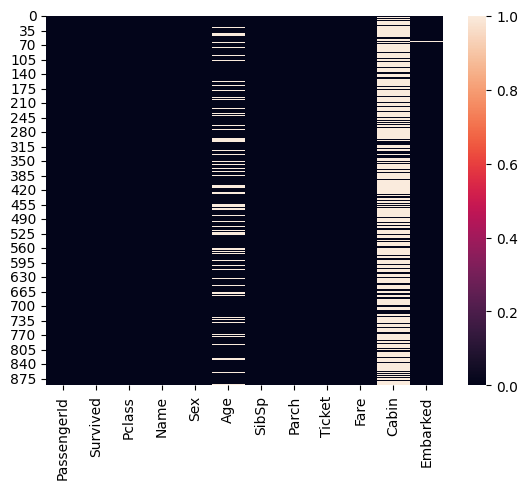

In [60]:
# we use seaborn to visualize feartures with missing values.
# according to our heatmap, it shows that more than 30% of our data in the cabin
# feature is missing.
sns.heatmap(train_df.isna())

In [61]:
# checking for duplicates in our dataset
# and shows that we have no duplicates in our dataset
train_df.duplicated().sum()

0

the next step we are going to focus on cleaning our dataset


**DATA CLEANING**

In [62]:
# we are going to use two methods when removing missing values in our dataset
# droping a column if 30% of its data is missing and perfom imputation on
# the rest.
# we shall use mean and mean mark for numerical features with missing values
# and mode for categorical features with missing values.

In [63]:
print('percentage of missing values')
for columns in train_df.columns:
  y = (train_df[columns].isna().sum()/891)*100

  print(columns ,'=', y ,'%')

percentage of missing values
PassengerId = 0.0 %
Survived = 0.0 %
Pclass = 0.0 %
Name = 0.0 %
Sex = 0.0 %
Age = 19.865319865319865 %
SibSp = 0.0 %
Parch = 0.0 %
Ticket = 0.0 %
Fare = 0.0 %
Cabin = 77.10437710437711 %
Embarked = 0.22446689113355783 %


In [64]:
# since more than 30% the data in the cabin is missing
# we are going to drop it

In [65]:
train_df1 =  train_df.drop(columns=['Cabin'])
train_df1

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  
0        0         A/5 21171   7.2500        S  
1        0          PC 17599  71.2833        C  
2        0  STON/O2. 3101282   7.9250        S  
3        0            113803  53.1000        S  
4        0            373450   8.0500        S  
..     ...               ...      ...      ...  
886      0            211536  13.0000        S  
887      0            112053  30.0000        S  
888      2        W./C. 6607  23.4500        S  
889      0            111369  30.0000        C  
890      0            370376   7.7500        Q  

[891 rows x 11 columns]

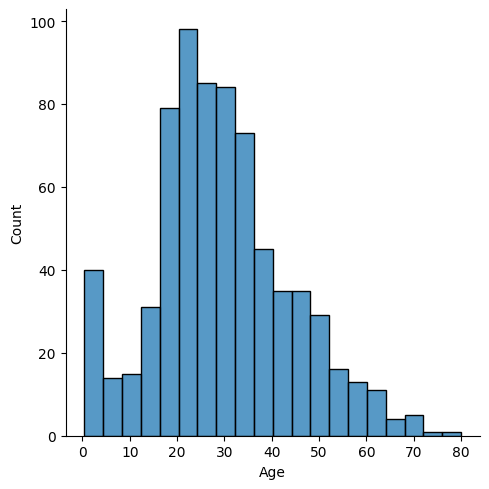

In [67]:
from matplotlib.pyplot import title
# since my age feature consists of numerical data
# it is important to check the distribution of the data
# and since our data follows  a normal distribution, we are going to use
# the median mark to fill up the miss data
sns.displot(train_df1.Age)

In [68]:
train_df1['Age'].median()

28.0

In [69]:
# filling up the rows of age feature with missing data
# with the median mark
train_df1.Age.fillna(train_df.Age.median(),inplace=True)

In [70]:
train_df1.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [71]:
# filling up the rows of Embarked  feature with missing data
# with the mode mark
train_df1.Embarked.fillna(train_df.Embarked.mode()[0],inplace=True)

In [72]:
train_df1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

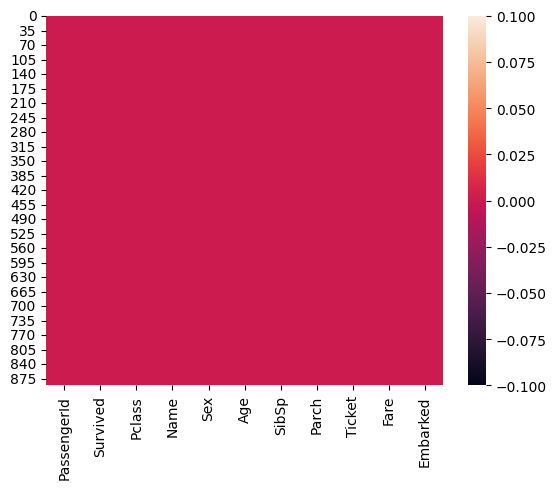

In [73]:
# comfirming that my data has no missing values
sns.heatmap(train_df1.isna())

In [74]:
# after cleaning and tidying up my data
# we going to perform some data analysis on our data.

**DATA ANALYSIS**

In [82]:
# for data analysis, we are going to use the 'pd.loc' method to acces our rows
# so as to be able to manipulate and perform mathmatical operations on our data

from our problem statement, our hypthesis states that all the women survived and all the men died

In [75]:
# we are going perform a hypothesis test to test how true
# is our hypothesis.

In [78]:
survived =len( train_df1.loc[train_df1['Survived']==1,['Sex','Survived']])
women = len(train_df1.loc[train_df1['Sex']=='female',['Sex','Survived']])
survived_women = len(train_df1.loc[(train_df1['Sex']=='female')
                              &(train_df1['Survived']==1),['Sex','Survived']])

In [81]:
train_df1.loc[train_df1['Survived']==1,['Sex','Survived']]

Sex  Survived
1    female         1
2    female         1
3    female         1
8    female         1
9    female         1
..      ...       ...
875  female         1
879  female         1
880  female         1
887  female         1
889    male         1

[342 rows x 2 columns]

In [87]:
print('females = ',women)
print('suvived_females = ',survived_women)
print('survived = ',survived)

females =  314
suvived_females =  233
survived =  342


In [88]:
# from my hypothesis test, it ti true that women survived more than men
# since @ > 0.5
print(survived_women/survived)

0.6812865497076024
